In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [3]:
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [14]:
madrid = pd.read_excel("madrid.xlsx", index_col = None)

In [15]:
madrid = madrid.drop(columns="Unnamed: 0")
madrid.head()

,match,competition,date,position,minutes_played,total_actions,total_actions_successful,TAS_percent,goals,assists,...,aerial_duels_won,ADW_percent,interceptions,losses,losses_own_half,LOH_percent,recoveries,recoveries_opp_half,ROPH_percent,pemain
0,Manchester City - Real Madrid 4:0,Europe. UEFA Champions League,5/17/23,CF,94,56,20,36,0,0,...,0,0,1,10,4,40,2,1,50,benzema
1,Real Madrid - Manchester City 1:1,Europe. UEFA Champions League,5/9/23,CF,96,49,28,57,0,0,...,0,0,0,6,0,0,1,1,100,benzema
2,Chelsea - Real Madrid 0:2,Europe. UEFA Champions League,4/18/23,CF,73,40,26,65,0,0,...,1,100,3,8,3,38,2,1,50,benzema
3,Real Madrid - Chelsea 2:0,Europe. UEFA Champions League,4/12/23,CF,95,76,44,58,1,0,...,1,50,4,12,2,17,4,4,100,benzema
4,Real Madrid - Liverpool 1:0,Europe. UEFA Champions League,3/15/23,CF,84,58,37,64,1,0,...,0,0,1,7,1,14,3,1,33,benzema


# EDA

In [22]:
# Filter data to only include rows related to 'Modric' or 'Kroos'
df_filtered = madrid[madrid['pemain'].isin(['modric', 'kroos'])]

# Define the columns for which you want to calculate descriptive statistics
selected_columns = ['passes_accurate', 'long_passes_accurate', 'crosses_accurate', 'interceptions']

# Calculate descriptive statistics for the selected columns for each player
desc_stats = df_filtered.groupby('pemain')[selected_columns].agg(['count','mean','std']).reset_index()

# Displaying the descriptive statistics
desc_stats

pemain passes_accurate                       long_passes_accurate   
                    count       mean        std                count   
0   kroos              30  63.966667  28.580779                   30  \
1  modric              29  55.448276  18.046737                   29   

                      crosses_accurate                     interceptions   
       mean       std            count      mean       std         count   
0  5.766667  4.107884               30  0.200000  0.550861            30  \
1  3.241379  2.370280               29  0.482759  0.737791            29   

                       
       mean       std  
0  2.800000  2.006885  
1  2.655172  2.057666

Kesimpulan
1. Passes Accurate: Kroos memiliki rata-rata keakuratan passing yang lebih tinggi dibandingkan dengan Modric.
2. Long Passes Accurate: Kroos juga unggul dalam keakuratan passing jarak jauh.
3. Crosses Accurate: Modric memiliki rata-rata keakuratan crossing yang lebih tinggi.
4. Interceptions: Kedua pemain memiliki rata-rata intersepsi yang hampir sama, dengan Kroos sedikit lebih unggul.

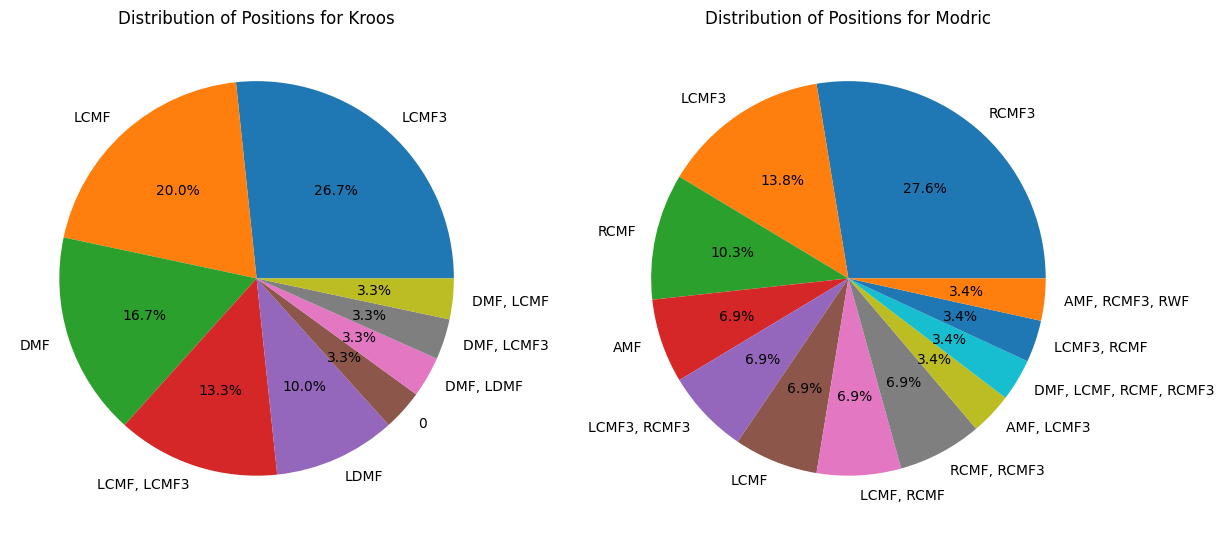

In [24]:
# Using 'value_counts' function to count the frequency of each position for 'Kroos' and 'Modric'
position_counts_kroos = df_filtered[df_filtered['pemain'] == 'kroos']['position'].value_counts()
position_counts_modric = df_filtered[df_filtered['pemain'] == 'modric']['position'].value_counts()

# Combining the two Series into one DataFrame for easier plotting
position_counts_combined = pd.DataFrame({'Kroos': position_counts_kroos, 'Modric': position_counts_modric}).fillna(0)

# Generate the pie charts for Kroos and Modric
plt.figure(figsize=(14, 7))

# Pie chart for Kroos
plt.subplot(1, 2, 1)
plt.pie(position_counts_kroos, labels=position_counts_kroos.index, autopct='%1.1f%%')
plt.title("Distribution of Positions for Kroos")

# Pie chart for Modric
plt.subplot(1, 2, 2)
plt.pie(position_counts_modric, labels=position_counts_modric.index, autopct='%1.1f%%')
plt.title("Distribution of Positions for Modric")

plt.show()

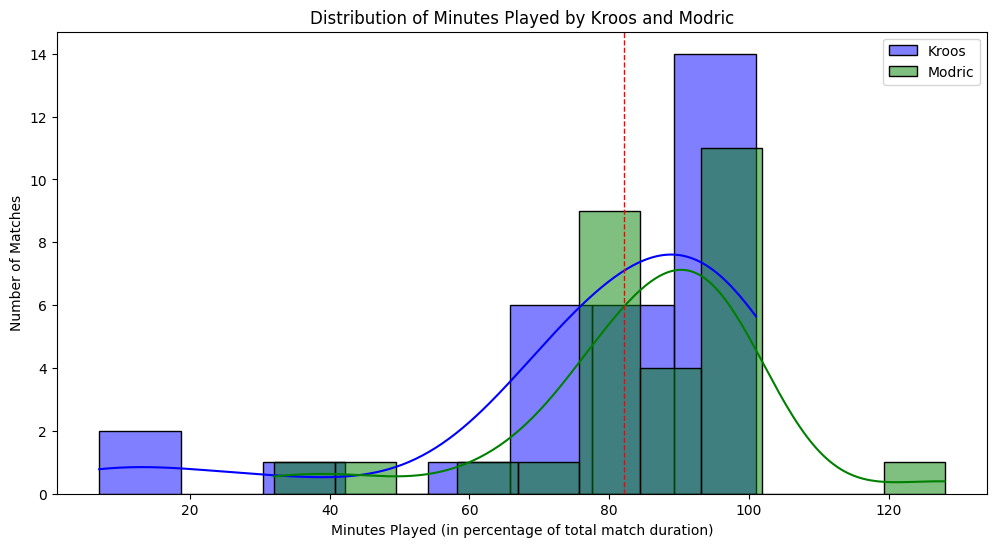

On average, players in the filtered dataset played 82.12 minutes per match.


In [25]:
import seaborn as sns

# Assume df_filtered is your DataFrame and 'minutes_played' is your column of interest
average_minutes_played = df_filtered['minutes_played'].mean()

# Plot the distribution of minutes played for both Kroos and Modric
plt.figure(figsize=(12, 6))

# Filter data for Kroos and Modric
minutes_played_kroos = df_filtered[df_filtered['pemain'] == 'kroos']['minutes_played']
minutes_played_modric = df_filtered[df_filtered['pemain'] == 'modric']['minutes_played']

# Plotting
sns.histplot(minutes_played_kroos, kde=True, color='blue', label='Kroos')
sns.histplot(minutes_played_modric, kde=True, color='green', label='Modric')
plt.axvline(average_minutes_played, color='red', linestyle='dashed', linewidth=1)

plt.title('Distribution of Minutes Played by Kroos and Modric')
plt.xlabel('Minutes Played (in percentage of total match duration)')
plt.ylabel('Number of Matches')
plt.legend()
plt.show()

print(f"On average, players in the filtered dataset played {average_minutes_played:.2f} minutes per match.")

On average, players in the filtered dataset have 59.78 passes_accurate per match.
The minimum passes_accurate in a match by players in the filtered dataset is 5.
The maximum passes_accurate in a match by players in the filtered dataset is 125.


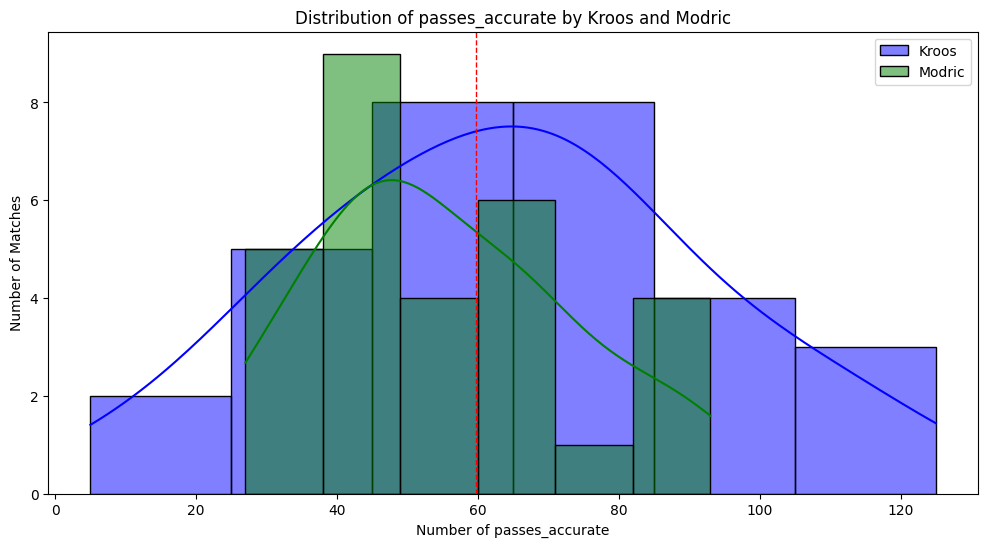

In [26]:
# Calculate the average passes_accurate for both Kroos and Modric
average_passes_accurate = df_filtered['passes_accurate'].mean()

# Find the minimum and maximum passes_accurate for both Kroos and Modric
min_passes_accurate = df_filtered['passes_accurate'].min()
max_passes_accurate = df_filtered['passes_accurate'].max()

# Print out the results
print(f"On average, players in the filtered dataset have {average_passes_accurate:.2f} passes_accurate per match.")
print(f"The minimum passes_accurate in a match by players in the filtered dataset is {min_passes_accurate}.")
print(f"The maximum passes_accurate in a match by players in the filtered dataset is {max_passes_accurate}.")

# Plot the distribution of passes_accurate for both Kroos and Modric
plt.figure(figsize=(12, 6))

# Filter data for Kroos and Modric
passes_accurate_kroos = df_filtered[df_filtered['pemain'] == 'kroos']['passes_accurate']
passes_accurate_modric = df_filtered[df_filtered['pemain'] == 'modric']['passes_accurate']

# Plotting
sns.histplot(passes_accurate_kroos, kde=True, color='blue', label='Kroos')
sns.histplot(passes_accurate_modric, kde=True, color='green', label='Modric')
plt.axvline(average_passes_accurate, color='red', linestyle='dashed', linewidth=1)

plt.title('Distribution of passes_accurate by Kroos and Modric')
plt.xlabel('Number of passes_accurate')
plt.ylabel('Number of Matches')
plt.legend()
plt.show()


On average, players in the filtered dataset have 2.73 interceptions per match.
The minimum interceptions in a match by players in the filtered dataset is 0.
The maximum interceptions in a match by players in the filtered dataset is 7.


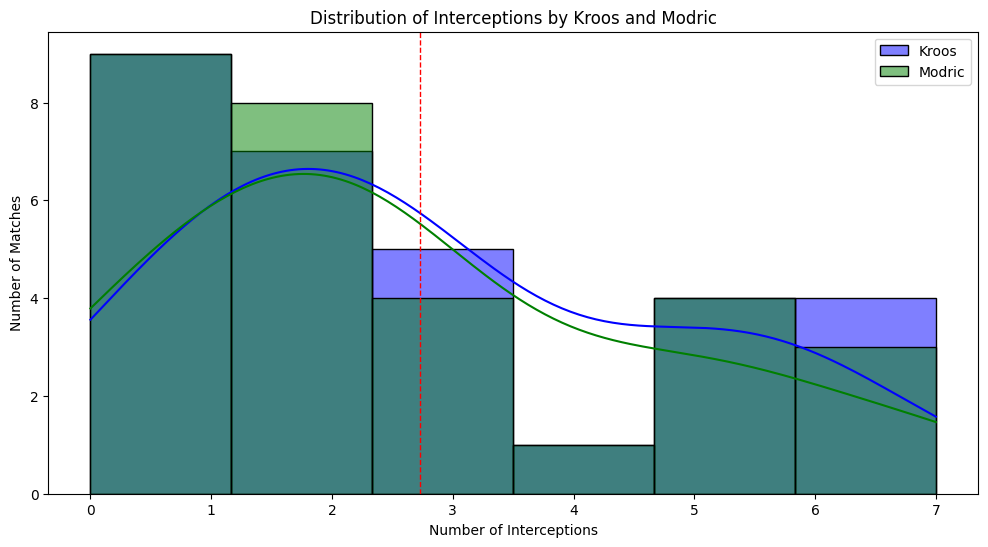

In [29]:
# Calculate the average interceptions for both Kroos and Modric
average_interceptions = df_filtered['interceptions'].mean()

# Find the minimum and maximum interceptions for both Kroos and Modric
min_interceptions = df_filtered['interceptions'].min()
max_interceptions = df_filtered['interceptions'].max()

# Print out the results
print(f"On average, players in the filtered dataset have {average_interceptions:.2f} interceptions per match.")
print(f"The minimum interceptions in a match by players in the filtered dataset is {min_interceptions}.")
print(f"The maximum interceptions in a match by players in the filtered dataset is {max_interceptions}.")

# Plot the distribution of interceptions for both Kroos and Modric
plt.figure(figsize=(12, 6))

# Filter data for Kroos and Modric
interceptions_kroos = df_filtered[df_filtered['pemain'] == 'kroos']['interceptions']
interceptions_modric = df_filtered[df_filtered['pemain'] == 'modric']['interceptions']

# Plotting
sns.histplot(interceptions_kroos, kde=True, color='blue', label='Kroos')
sns.histplot(interceptions_modric, kde=True, color='green', label='Modric')
plt.axvline(average_interceptions, color='red', linestyle='dashed', linewidth=1)

plt.title('Distribution of Interceptions by Kroos and Modric')
plt.xlabel('Number of Interceptions')
plt.ylabel('Number of Matches')
plt.legend()
plt.show()

# Kurtosis

In [30]:
from scipy.stats import kurtosis

# Calculate and display the kurtosis for the variables of interest in df_filtered_new
kurtosis_values = {}
for col in ['crosses_accurate', 'dribbles_successful', 'passes_accurate', 'long_passes_accurate', 'duels_won', 'interceptions']:
    cur = kurtosis(df_filtered[col])
    kurtosis_values[col] = cur
    print(f'Kurtosis of {col}: {cur:.2f}')

Kurtosis of crosses_accurate: 1.43
Kurtosis of dribbles_successful: 0.43
Kurtosis of passes_accurate: -0.01
Kurtosis of long_passes_accurate: 1.26
Kurtosis of duels_won: 3.20
Kurtosis of interceptions: -0.70


In [31]:
# Filter the data for Kroos and Modric
df_kroos = df_filtered[df_filtered['pemain'] == 'kroos']
df_modric = df_filtered[df_filtered['pemain'] == 'modric']

# Calculate and display the kurtosis for the variables of interest for each player
kurtosis_values_kroos = {}
kurtosis_values_modric = {}

for col in ['crosses_accurate', 'dribbles_successful', 'passes_accurate', 'long_passes_accurate', 'duels_won', 'interceptions']:
    kurtosis_kroos = kurtosis(df_kroos[col])
    kurtosis_modric = kurtosis(df_modric[col])
    
    kurtosis_values_kroos[col] = kurtosis_kroos
    kurtosis_values_modric[col] = kurtosis_modric
    
    print(f"Kurtosis of {col} for Kroos: {kurtosis_kroos:.2f}")
    print(f"Kurtosis of {col} for Modric: {kurtosis_modric:.2f}")

Kurtosis of crosses_accurate for Kroos: 5.47
Kurtosis of crosses_accurate for Modric: -0.17
Kurtosis of dribbles_successful for Kroos: 3.98
Kurtosis of dribbles_successful for Modric: -0.48
Kurtosis of passes_accurate for Kroos: -0.44
Kurtosis of passes_accurate for Modric: -0.66
Kurtosis of long_passes_accurate for Kroos: 0.24
Kurtosis of long_passes_accurate for Modric: -0.97
Kurtosis of duels_won for Kroos: -0.20
Kurtosis of duels_won for Modric: 5.92
Kurtosis of interceptions for Kroos: -0.86
Kurtosis of interceptions for Modric: -0.52


Kroos
- Crosses Accurate: 5.47 (Leptokurtic)
- Dribbles Successful: 3.98 (Leptokurtic)
- Passes Accurate: -0.44 (Platykurtic)
- Long Passes Accurate: 0.24 (Mesokurtic)
- Duels Won: -0.20 (Platykurtic)
- Interceptions: -0.86 (Platykurtic)

Modric
- Crosses Accurate: -0.17 (Platykurtic)
- Dribbles Successful: -0.48 (Platykurtic)
- Passes Accurate: -0.66 (Platykurtic)
- Long Passes Accurate: -0.97 (Platykurtic)
- Duels Won: 5.92 (Leptokurtic)
- Interceptions: -0.52 (Platykurtic)

Kesimpulan
- Kroos:
Variabel seperti Crosses Accurate dan Dribbles Successful menunjukkan distribusi leptokurtik, yang mengindikasikan adanya outlier atau nilai ekstrem.
Variabel seperti Passes Accurate, Duels Won, dan Interceptions menunjukkan distribusi platykurtik, yang menunjukkan distribusi data yang lebih merata.

- Modric:
Variabel Duels Won menunjukkan distribusi leptokurtik, yang mengindikasikan adanya outlier atau nilai ekstrem.
Variabel lainnya menunjukkan distribusi platykurtik, yang menunjukkan distribusi data yang lebih merata.

In [32]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Create a StandardScaler instance
scaler = StandardScaler()

# Define the variables based on the kurtosis findings for Kroos and Modric
platykurtic_variables_kroos = df_kroos[['passes_accurate', 'duels_won', 'interceptions']]
leptokurtic_variables_kroos = df_kroos[['crosses_accurate', 'dribbles_successful']]
mesokurtic_variables_kroos = df_kroos[['long_passes_accurate']]

platykurtic_variables_modric = df_modric[['passes_accurate', 'crosses_accurate', 'dribbles_successful', 'long_passes_accurate', 'interceptions']]
leptokurtic_variables_modric = df_modric[['duels_won']]

# Normalize the platykurtic, leptokurtic, and mesokurtic variables for Kroos
platykurtic_variables_normalized_kroos = scaler.fit_transform(platykurtic_variables_kroos)
platykurtic_variables_normalized_kroos = pd.DataFrame(platykurtic_variables_normalized_kroos, columns=platykurtic_variables_kroos.columns)

leptokurtic_variables_normalized_kroos = scaler.fit_transform(leptokurtic_variables_kroos)
leptokurtic_variables_normalized_kroos = pd.DataFrame(leptokurtic_variables_normalized_kroos, columns=leptokurtic_variables_kroos.columns)

mesokurtic_variables_normalized_kroos = scaler.fit_transform(mesokurtic_variables_kroos)
mesokurtic_variables_normalized_kroos = pd.DataFrame(mesokurtic_variables_normalized_kroos, columns=mesokurtic_variables_kroos.columns)

# Normalize the platykurtic and leptokurtic variables for Modric
platykurtic_variables_normalized_modric = scaler.fit_transform(platykurtic_variables_modric)
platykurtic_variables_normalized_modric = pd.DataFrame(platykurtic_variables_normalized_modric, columns=platykurtic_variables_modric.columns)

leptokurtic_variables_normalized_modric = scaler.fit_transform(leptokurtic_variables_modric)
leptokurtic_variables_normalized_modric = pd.DataFrame(leptokurtic_variables_normalized_modric, columns=leptokurtic_variables_modric.columns)

# Print the normalized data for Kroos and Modric
print("\nPlatykurtic variables normalized for Kroos:")
print(platykurtic_variables_normalized_kroos.head())

print("\nLeptokurtic variables normalized for Kroos:")
print(leptokurtic_variables_normalized_kroos.head())

print("\nMesokurtic variables normalized for Kroos:")
print(mesokurtic_variables_normalized_kroos.head())

print("\nPlatykurtic variables normalized for Modric:")
print(platykurtic_variables_normalized_modric.head())

print("\nLeptokurtic variables normalized for Modric:")
print(leptokurtic_variables_normalized_modric.head())



Platykurtic variables normalized for Kroos:
   passes_accurate  duels_won  interceptions
0        -1.279935   2.202443       0.608164
1        -0.497027   0.208852       1.621770
2        -0.568201  -0.360745      -0.912245
3         0.285880   1.632846       0.101361
4        -0.247921   0.493651       0.101361

Leptokurtic variables normalized for Kroos:
   crosses_accurate  dribbles_successful
0         -0.369274            -0.654654
1         -0.369274            -0.654654
2         -0.369274            -0.654654
3         -0.369274            -0.654654
4          3.323470             0.436436

Mesokurtic variables normalized for Kroos:
   long_passes_accurate
0             -1.427803
1             -0.189824
2             -0.932611
3             -0.437419
4              0.305368

Platykurtic variables normalized for Modric:
   passes_accurate  crosses_accurate  dribbles_successful   
0        -1.604269         -0.665912            -1.181922  \
1        -0.814774          0.713477  

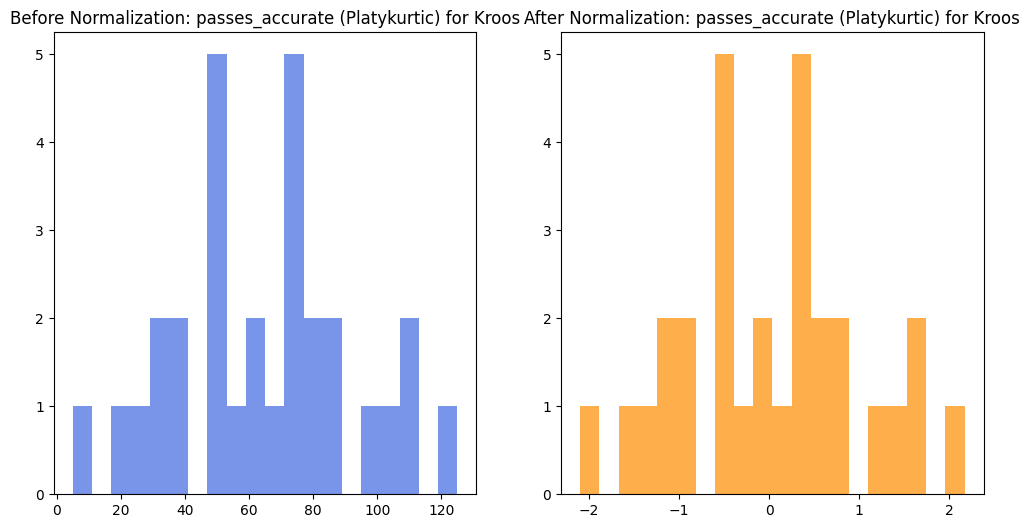

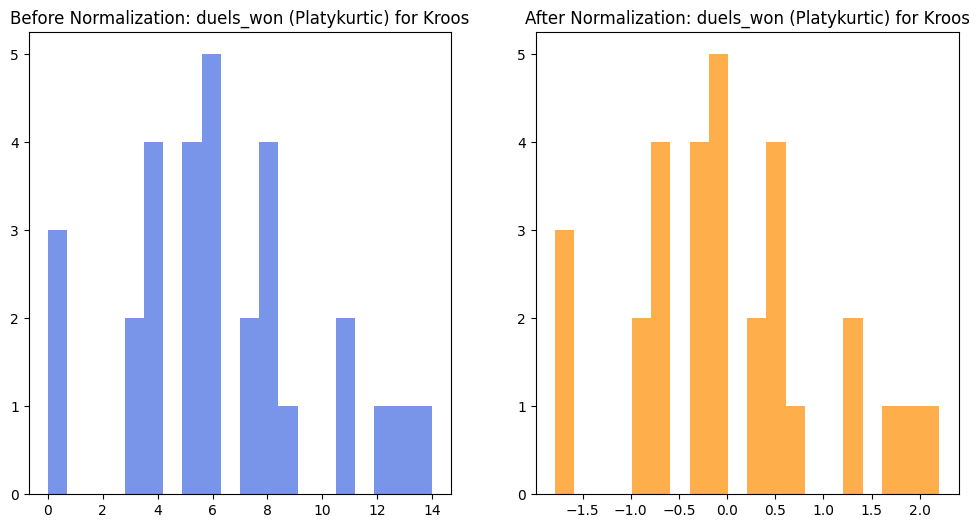

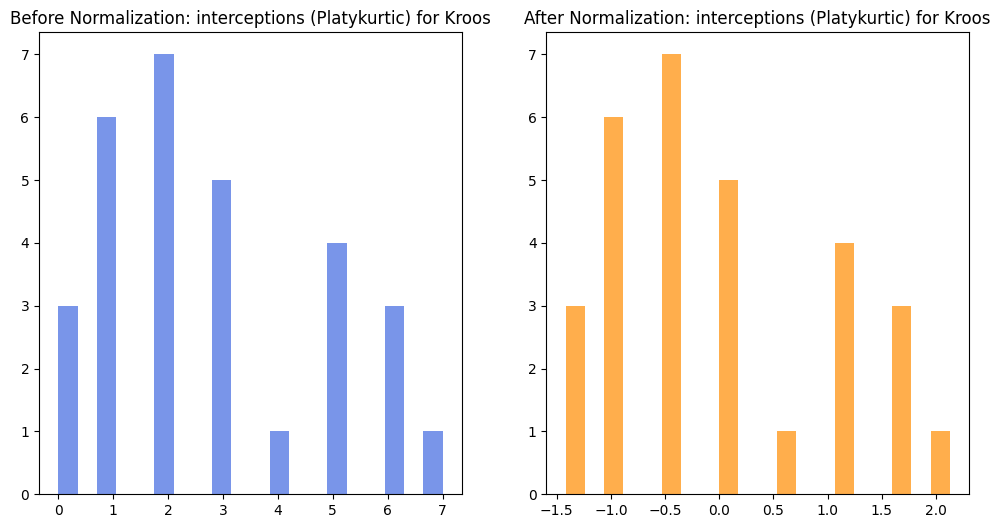

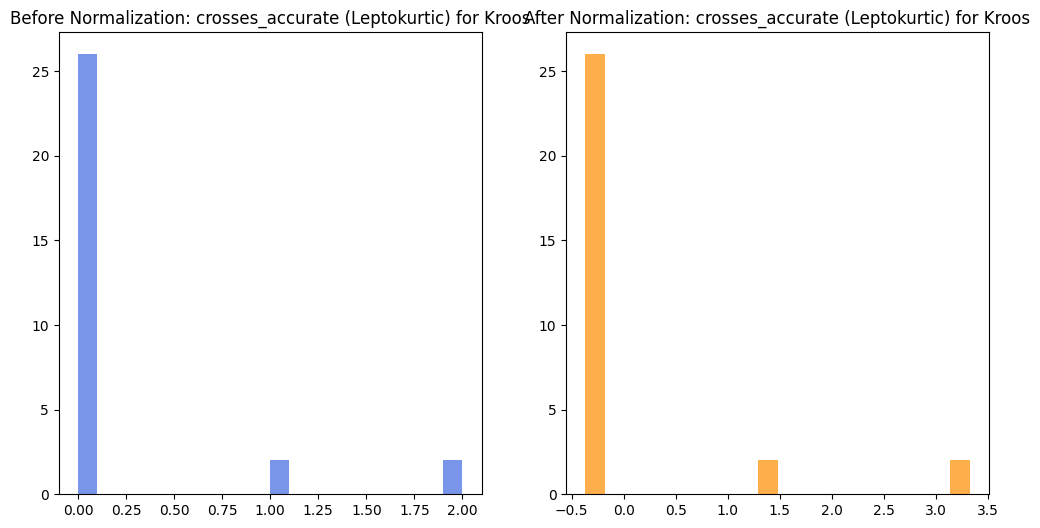

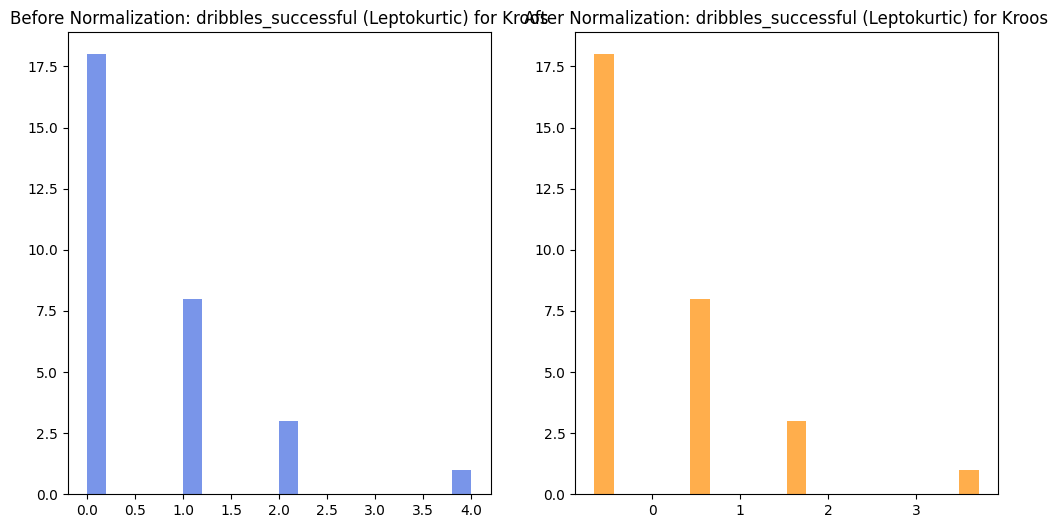

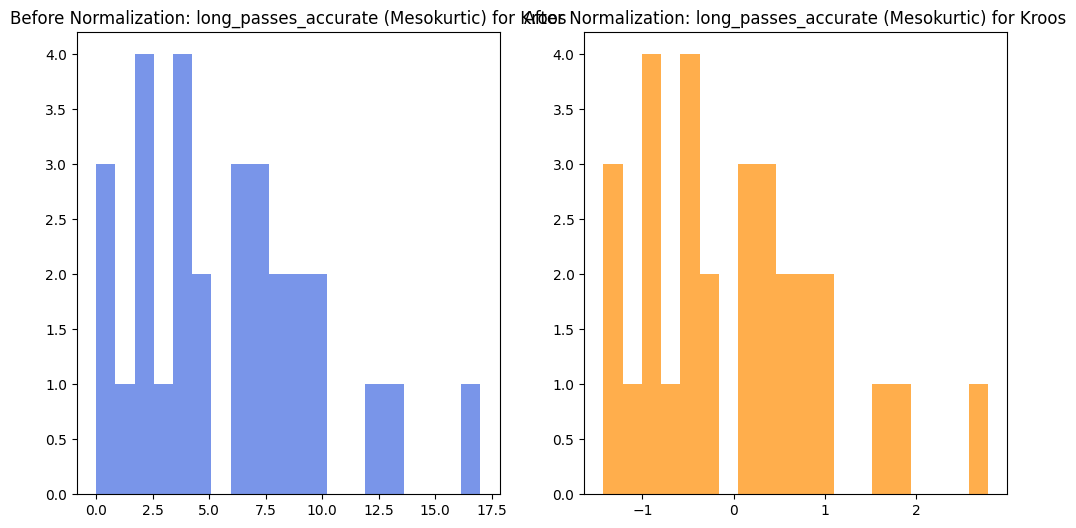

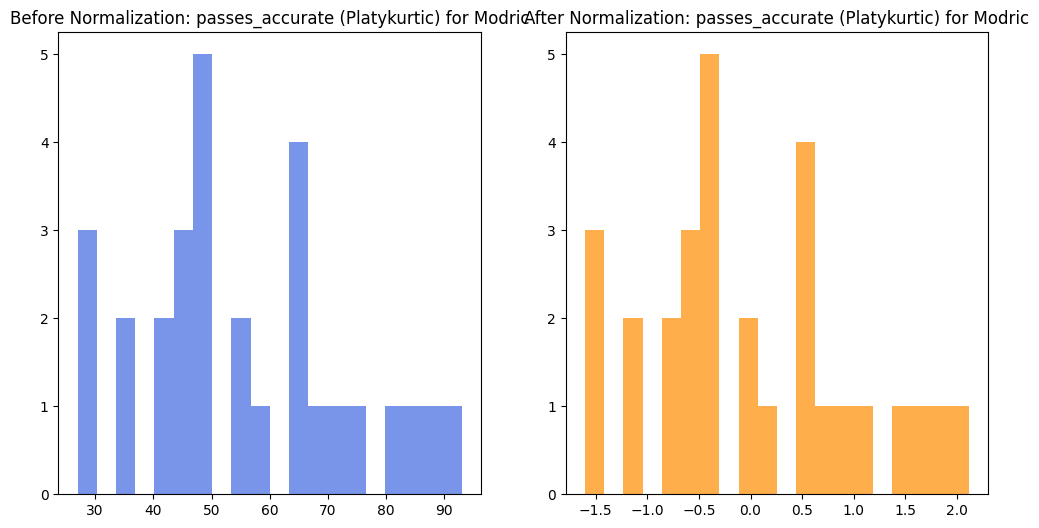

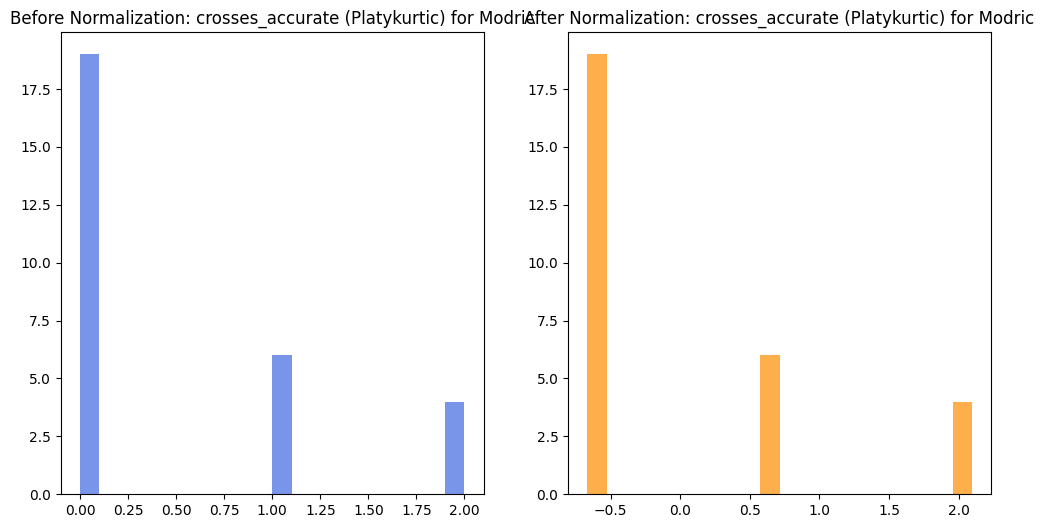

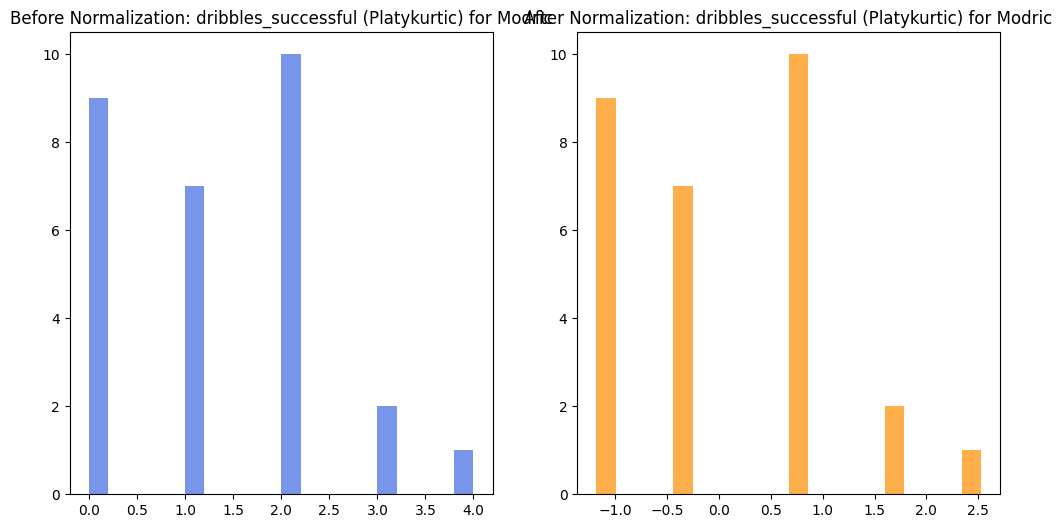

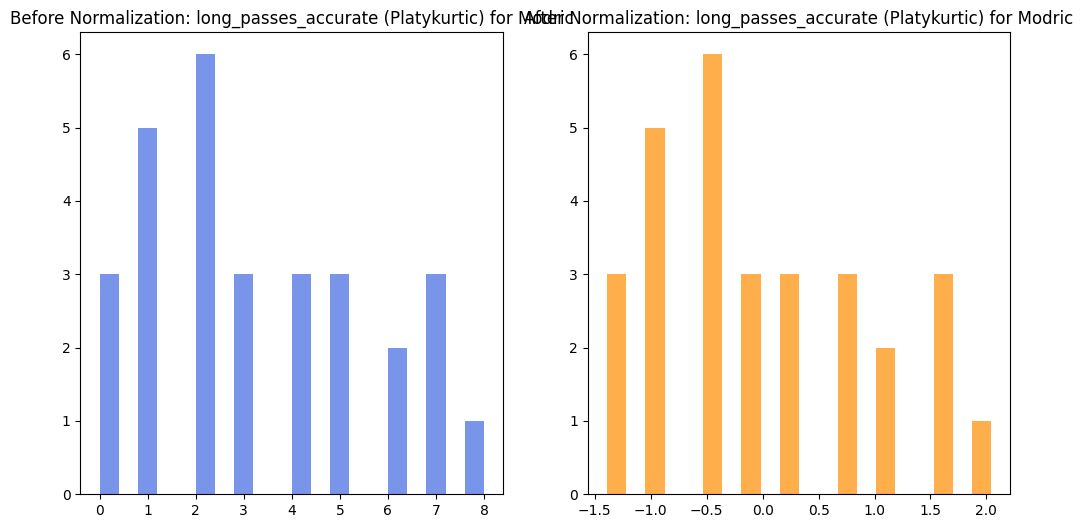

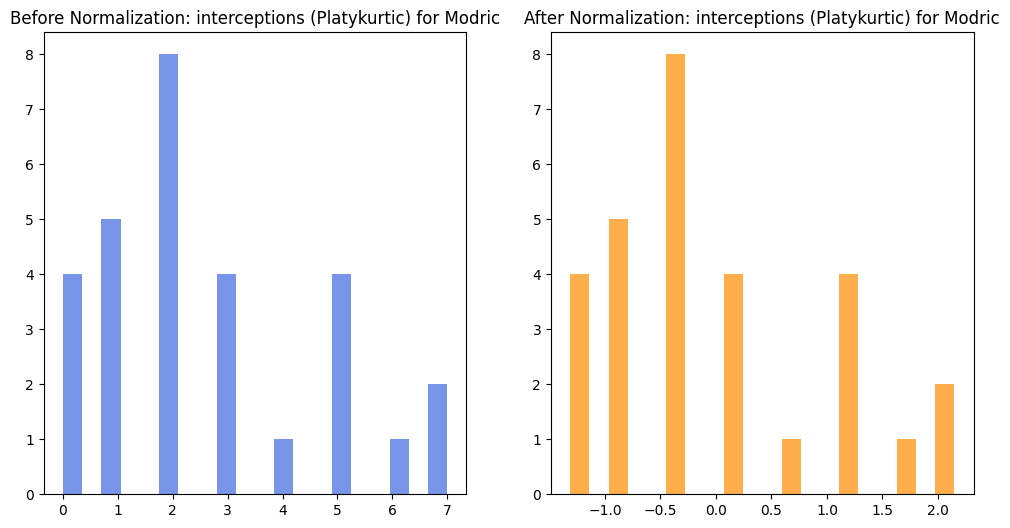

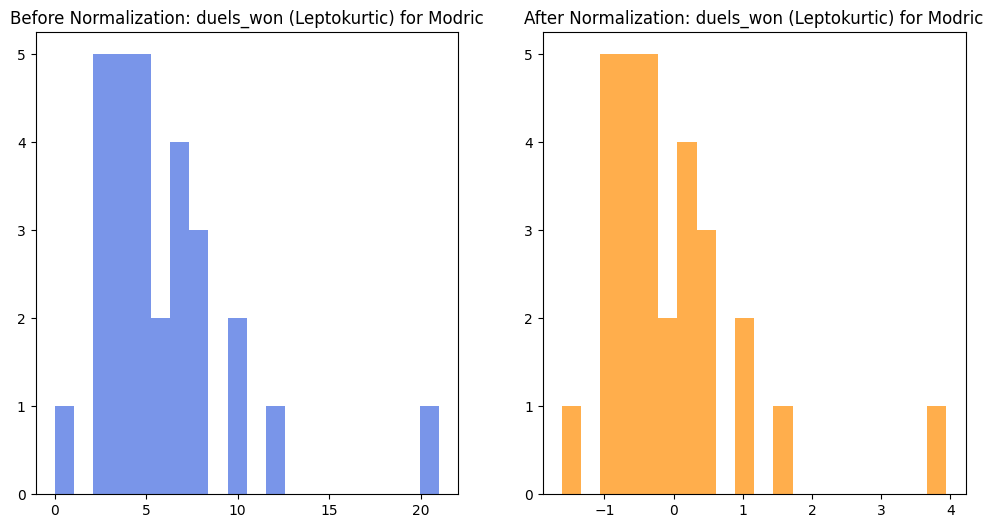

In [33]:
# Plot the before and after normalization distributions for each type of variables for Kroos and Modric
variables_kroos = [("Platykurtic", platykurtic_variables_kroos, platykurtic_variables_normalized_kroos), 
                   ("Leptokurtic", leptokurtic_variables_kroos, leptokurtic_variables_normalized_kroos),
                   ("Mesokurtic", mesokurtic_variables_kroos, mesokurtic_variables_normalized_kroos)]

variables_modric = [("Platykurtic", platykurtic_variables_modric, platykurtic_variables_normalized_modric), 
                    ("Leptokurtic", leptokurtic_variables_modric, leptokurtic_variables_normalized_modric)]

for player, variables in [("Kroos", variables_kroos), ("Modric", variables_modric)]:
    for kurtosis_type, original_variables, normalized_variables in variables:
        for col in original_variables.columns:
            plt.figure(figsize=(12, 6))

            plt.subplot(1, 2, 1)
            plt.hist(original_variables[col], bins=20, color='royalblue', alpha=0.7)
            plt.title(f'Before Normalization: {col} ({kurtosis_type}) for {player}')

            plt.subplot(1, 2, 2)
            plt.hist(normalized_variables[col], bins=20, color='darkorange', alpha=0.7)
            plt.title(f'After Normalization: {col} ({kurtosis_type}) for {player}')

            plt.show()

## Sampling Statistics, Distribution & Standard Error

In [34]:
from scipy.stats import sem

# Define function to calculate sampling statistics
def sampling_statistics(data, variable):
    mean_value = np.mean(data[variable])
    std_value = np.std(data[variable])
    std_error = sem(data[variable])
    
    return mean_value, std_value, std_error

# Define function to display sampling statistics
def display_sampling_statistics(player, data, variables):
    print(f"\nSampling Statistics for {player}:")
    for variable in variables:
        mean, std, std_err = sampling_statistics(data, variable)
        print(f"{variable.capitalize()} - Mean: {mean:.2f}, Standard Deviation: {std:.2f}, Standard Error: {std_err:.2f}")

# Calculate and display sampling statistics for Kroos and Modric
variables_to_sample = ['crosses_accurate', 'dribbles_successful', 'passes_accurate', 'long_passes_accurate', 'duels_won', 'interceptions']
display_sampling_statistics("Kroos", df_kroos, variables_to_sample)
display_sampling_statistics("Modric", df_modric, variables_to_sample)


Sampling Statistics for Kroos:
Crosses_accurate - Mean: 0.20, Standard Deviation: 0.54, Standard Error: 0.10
Dribbles_successful - Mean: 0.60, Standard Deviation: 0.92, Standard Error: 0.17
Passes_accurate - Mean: 63.97, Standard Deviation: 28.10, Standard Error: 5.22
Long_passes_accurate - Mean: 5.77, Standard Deviation: 4.04, Standard Error: 0.75
Duels_won - Mean: 6.27, Standard Deviation: 3.51, Standard Error: 0.65
Interceptions - Mean: 2.80, Standard Deviation: 1.97, Standard Error: 0.37

Sampling Statistics for Modric:
Crosses_accurate - Mean: 0.48, Standard Deviation: 0.72, Standard Error: 0.14
Dribbles_successful - Mean: 1.28, Standard Deviation: 1.08, Standard Error: 0.20
Passes_accurate - Mean: 55.45, Standard Deviation: 17.73, Standard Error: 3.35
Long_passes_accurate - Mean: 3.24, Standard Deviation: 2.33, Standard Error: 0.44
Duels_won - Mean: 6.10, Standard Deviation: 3.78, Standard Error: 0.71
Interceptions - Mean: 2.66, Standard Deviation: 2.02, Standard Error: 0.38


Kesimpulan:
 Dari data ini, kita bisa melihat beberapa perbedaan dalam performa antara Kroos dan Modric. Misalnya, Modric memiliki mean yang lebih tinggi untuk Crosses Accurate dan Dribbles Successful sementara Kroos unggul dalam Passes Accurate. Selain itu, standar deviasi dan kesalahan standar memberikan wawasan lebih lanjut tentang variabilitas dan keandalan estimasi ini.

In [38]:
# Re-defining the variables to sample, as it seems to have been lost in the environment
variables_to_sample = ['crosses_accurate', 'dribbles_successful', 'passes_accurate', 'long_passes_accurate', 'duels_won', 'interceptions']

# Conduct the t-tests for the original variables using the original (non-normalized) data
t_test_original_results = {}
for col in variables_to_sample:
    modric_data = df_modric[col]
    kroos_data = df_kroos[col]
    t_stat, p_value = stats.ttest_ind(modric_data, kroos_data, nan_policy='omit')  # omit NaN values
    t_test_original_results[col] = {'t_stat': t_stat, 'p_value': p_value}

t_test_original_results

{'crosses_accurate': {'t_stat': 1.6718881228333304,
  'p_value': 0.10002789509068329},
 'dribbles_successful': {'t_stat': 2.5511059750674523,
  'p_value': 0.013447026117695632},
 'passes_accurate': {'t_stat': -1.363445586043092,
  'p_value': 0.17810325852579495},
 'long_passes_accurate': {'t_stat': -2.87897664186371,
  'p_value': 0.0056091223966842725},
 'duels_won': {'t_stat': -0.16893828340585854, 'p_value': 0.8664432725492182},
 'interceptions': {'t_stat': -0.2736929739905147,
  'p_value': 0.7853099172381501}}

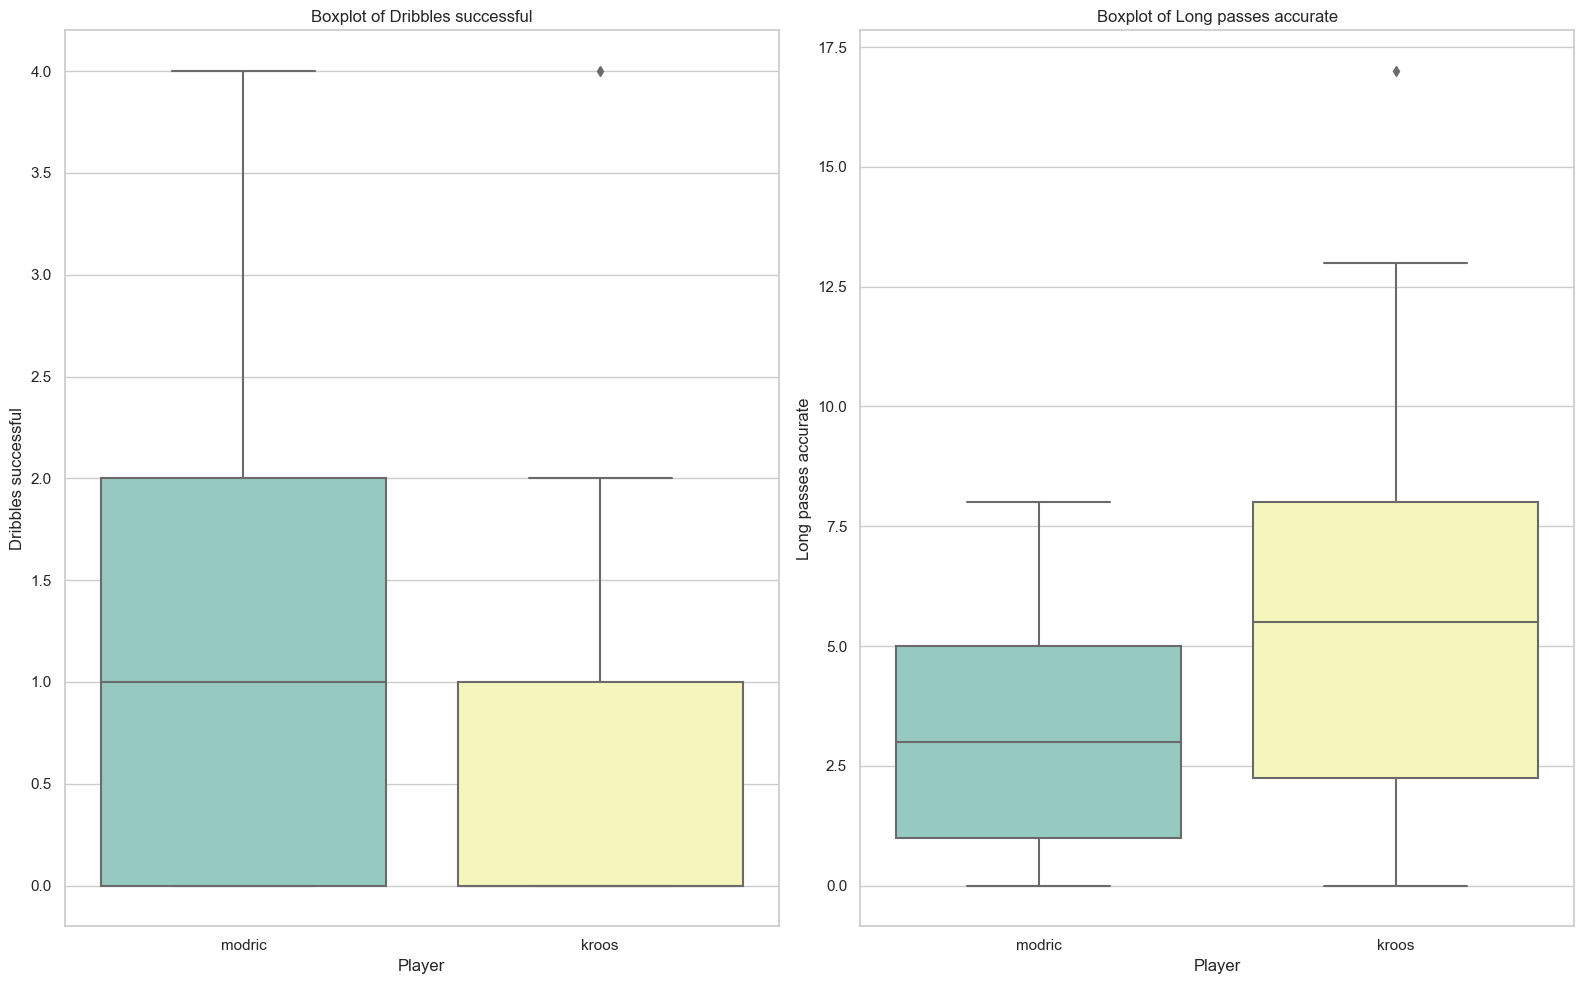

In [47]:
# Re-create the original DataFrames for Modric and Kroos based on the filtered DataFrame
df_modric1 = df_filtered[df_filtered['pemain'] == 'modric']
df_kroos1 = df_filtered[df_filtered['pemain'] == 'kroos']

# Combine the DataFrames for the boxplot
combined_df = pd.concat([df_modric1, df_kroos1], axis=0).reset_index(drop=True)

# Initialize the figure
plt.figure(figsize=(16, 10))

# Perform A/B tests for each of the variables where the p-value indicated a significant difference
significant_variables = ['dribbles_successful', 'long_passes_accurate']

# Create subplots for each significant variable
for i, col in enumerate(significant_variables, 1):
    plt.subplot(1, 2, i)
    
    # Create the boxplot
    sns.boxplot(x='pemain', y=col, data=combined_df, palette="Set3")
    
    # Add titles and labels
    plt.title(f'Boxplot of {col.replace("_", " ").capitalize()}')
    plt.xlabel('Player')
    plt.ylabel(col.replace("_", " ").capitalize())

plt.tight_layout()
plt.show()

In [40]:
from scipy import stats

# Initialize a dictionary to store the results of the A/B tests
ab_test_results = {}

# Perform A/B tests for each of the variables where the p-value indicated a significant difference
significant_variables = ['dribbles_successful', 'long_passes_accurate']

for col in significant_variables:
    # Data for each player
    modric_data = df_modric[col]
    kroos_data = df_kroos[col]
    
    # Perform the t-test
    t_stat, p_value = stats.ttest_ind(modric_data, kroos_data, nan_policy='omit')  # omit NaN values
    
    # Add the results to the dictionary
    ab_test_results[col] = {'t_stat': t_stat, 'p_value': p_value}

ab_test_results

{'dribbles_successful': {'t_stat': 2.5511059750674523,
  'p_value': 0.013447026117695632},
 'long_passes_accurate': {'t_stat': -2.87897664186371,
  'p_value': 0.0056091223966842725}}

In [35]:
# Normalize variables for Kroos
normalized_kroos = scaler.fit_transform(df_kroos[variables_to_sample])
normalized_kroos = pd.DataFrame(normalized_kroos, columns=variables_to_sample)
normalized_kroos['pemain'] = 'kroos'

# Normalize variables for Modric
normalized_modric = scaler.fit_transform(df_modric[variables_to_sample])
normalized_modric = pd.DataFrame(normalized_modric, columns=variables_to_sample)
normalized_modric['pemain'] = 'modric'

# Combine the normalized data for both players
normalized_data = pd.concat([normalized_kroos, normalized_modric], axis=0).reset_index(drop=True)

normalized_data.head()

,crosses_accurate,dribbles_successful,passes_accurate,long_passes_accurate,duels_won,interceptions,pemain
0,-0.369274,-0.654654,-1.279935,-1.427803,2.202443,0.608164,kroos
1,-0.369274,-0.654654,-0.497027,-0.189824,0.208852,1.621770,kroos
2,-0.369274,-0.654654,-0.568201,-0.932611,-0.360745,-0.912245,kroos
3,-0.369274,-0.654654,0.285880,-0.437419,1.632846,0.101361,kroos
4,3.323470,0.436436,-0.247921,0.305368,0.493651,0.101361,kroos


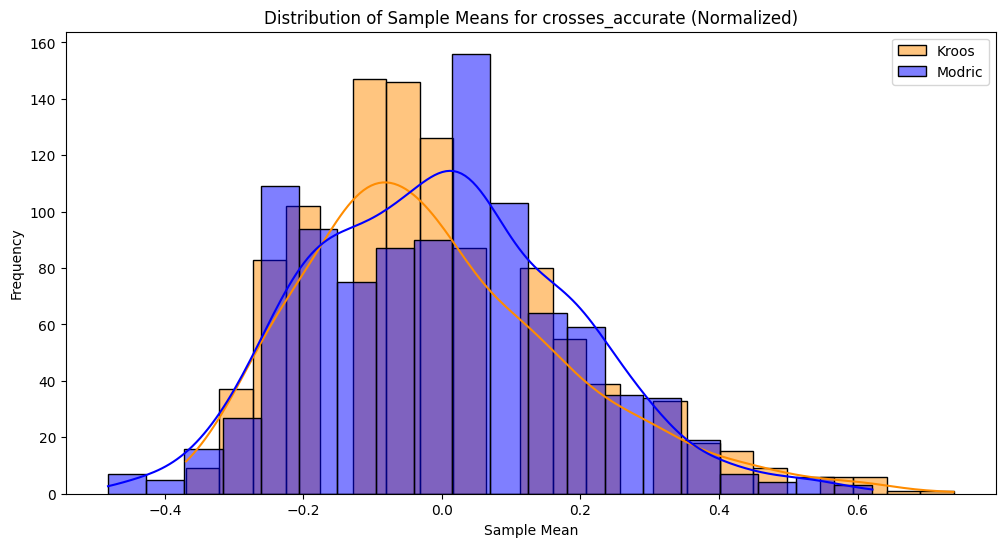

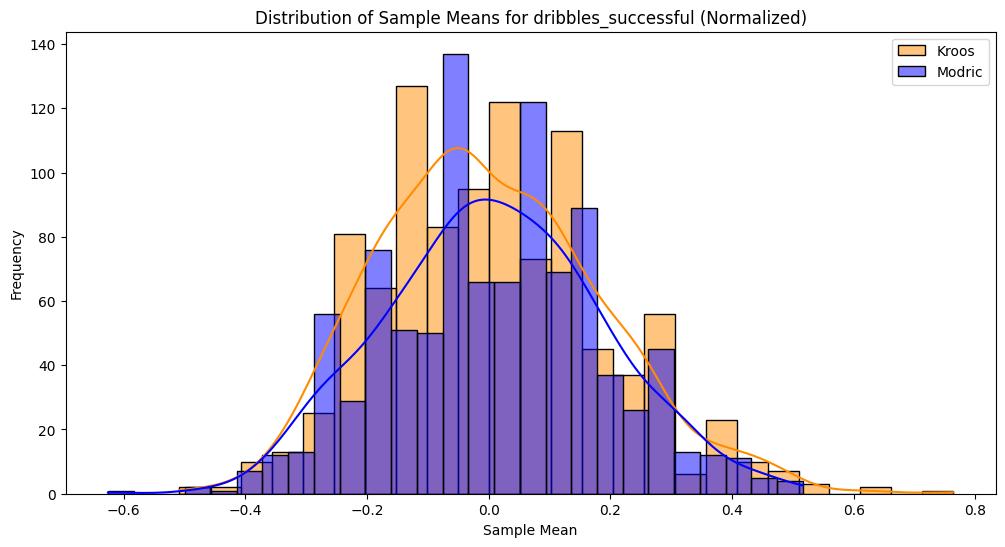

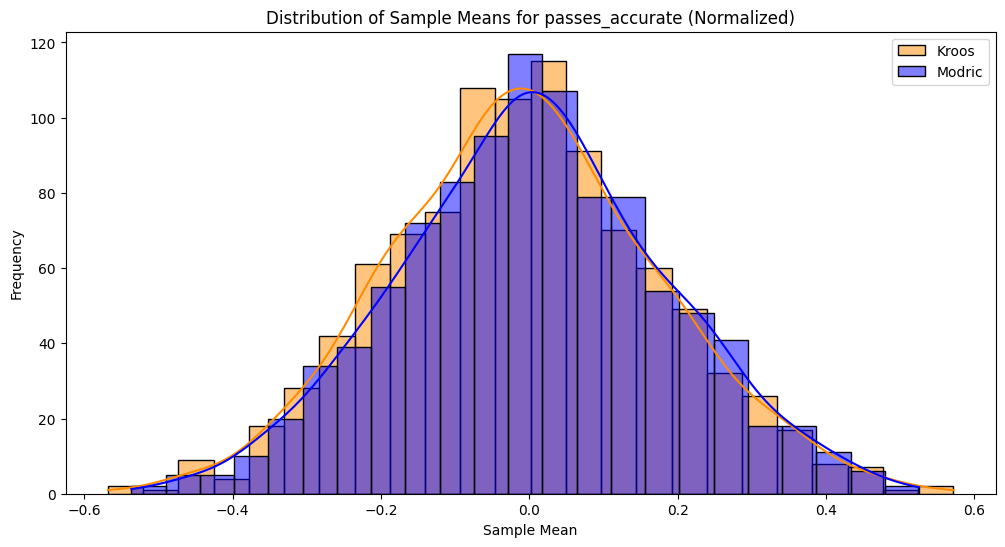

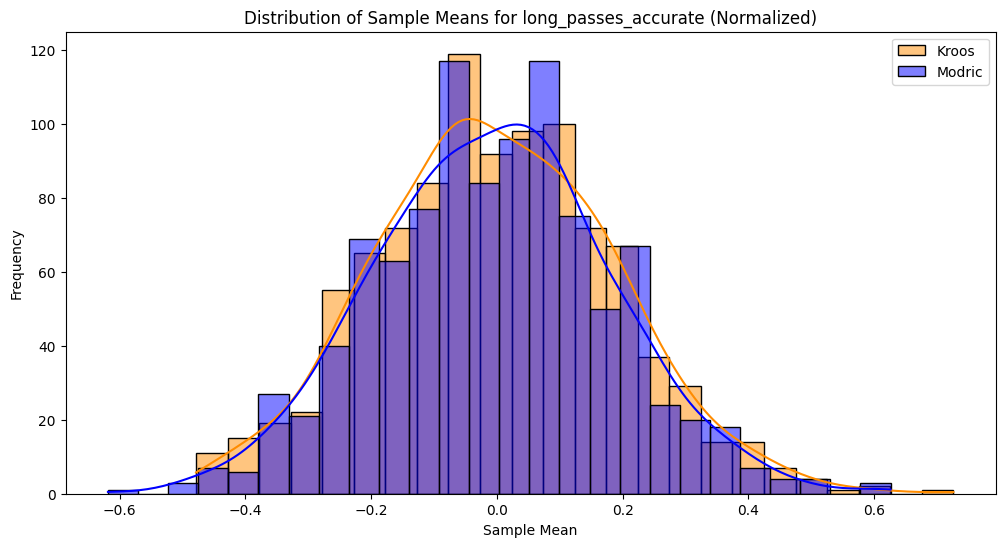

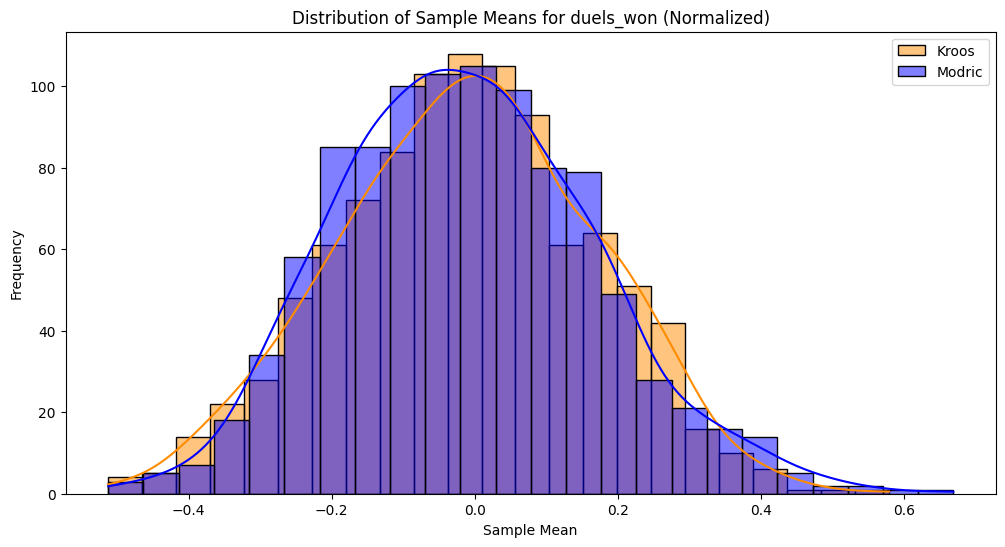

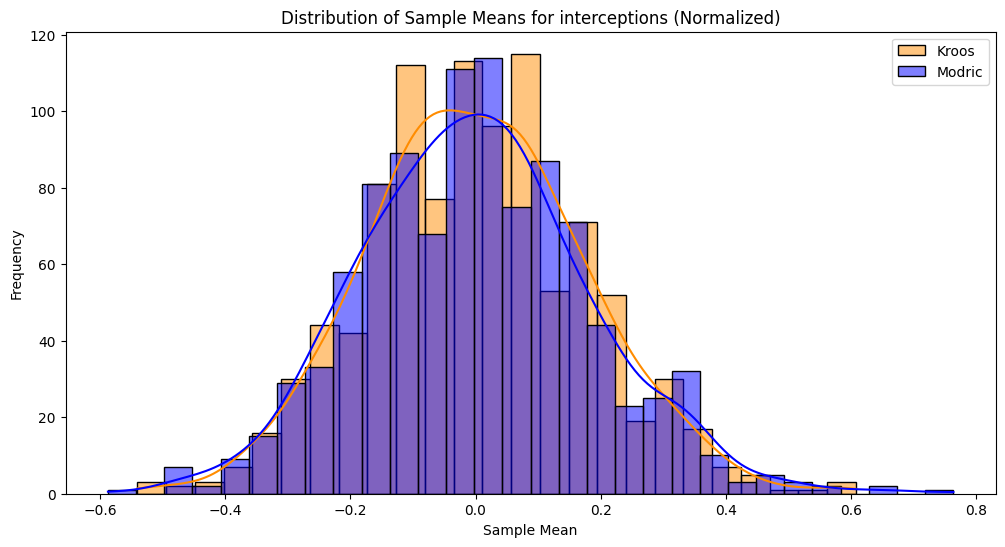

In [36]:
features = variables_to_sample

# Define number of samples and sample size
num_samples = 1000
sample_size = 30  # A smaller sample size, as our dataset may not be large

# Generate the means of the samples for each feature
for index, feature in enumerate(features):
    sample_means_kroos = []
    sample_means_modric = []
    
    # Generate sample means for Kroos
    for _ in range(num_samples):
        sample = np.random.choice(normalized_kroos[feature].dropna().values.flatten(), size=sample_size)
        sample_means_kroos.append(np.mean(sample))
        
    # Generate sample means for Modric
    for _ in range(num_samples):
        sample = np.random.choice(normalized_modric[feature].dropna().values.flatten(), size=sample_size)
        sample_means_modric.append(np.mean(sample))
    
    # Plot the distribution of the sample means
    plt.figure(figsize=(12, 6))
    
    sns.histplot(sample_means_kroos, kde=True, color='darkorange', label='Kroos')
    sns.histplot(sample_means_modric, kde=True, color='blue', label='Modric')
    
    plt.title(f'Distribution of Sample Means for {feature} (Normalized)')
    plt.xlabel('Sample Mean')
    plt.ylabel('Frequency')
    plt.legend()
    
    plt.show()

In [37]:
# Performing Hypothesis Testing and A/B Testing on the normalized data for selected features
from scipy.stats import ttest_ind

# Initialize dictionaries to store Hypothesis Testing and A/B Testing results
hypothesis_test_results = {}
ab_test_results = {}

# Define the significance level (alpha)
alpha = 0.05

# Perform Hypothesis Testing and A/B Testing for each variable
for var in variables_to_sample:
    # Perform A/B Testing
    t_stat, p_value = ttest_ind(normalized_kroos[var], normalized_modric[var])
    
    # Determine the result based on p-value and alpha
    if p_value < alpha:
        result = "Reject Null Hypothesis: Significant Difference"
    else:
        result = "Fail to Reject Null Hypothesis: No Significant Difference"
    
    # Store the results
    hypothesis_test_results[var] = {'T-Statistic': t_stat, 'p-value': p_value, 'Result': result}
    
# Display the results
hypothesis_test_results

{'crosses_accurate': {'T-Statistic': 1.4738641190880426e-16,
  'p-value': 0.9999999999999999,
  'Result': 'Fail to Reject Null Hypothesis: No Significant Difference'},
 'dribbles_successful': {'T-Statistic': 3.8604643511407395e-16,
  'p-value': 0.9999999999999997,
  'Result': 'Fail to Reject Null Hypothesis: No Significant Difference'},
 'passes_accurate': {'T-Statistic': 2.966994435811223e-16,
  'p-value': 0.9999999999999998,
  'Result': 'Fail to Reject Null Hypothesis: No Significant Difference'},
 'long_passes_accurate': {'T-Statistic': -1.440148273226551e-16,
  'p-value': 0.9999999999999999,
  'Result': 'Fail to Reject Null Hypothesis: No Significant Difference'},
 'duels_won': {'T-Statistic': 5.11758374683348e-16,
  'p-value': 0.9999999999999996,
  'Result': 'Fail to Reject Null Hypothesis: No Significant Difference'},
 'interceptions': {'T-Statistic': 5.664262104730516e-16,
  'p-value': 0.9999999999999996,
  'Result': 'Fail to Reject Null Hypothesis: No Significant Difference'}}